以回归模型为例

In [2]:
import pandas as pd
df=pd.read_excel('./data/股票客户流失.xlsx')
X=df.drop(columns='是否流失')
y=df['是否流失']
# 切分 训练集、测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1) # test_size测试集的比例
#模型训练
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()#使用默认参数
model.fit(X_train,y_train)#使用训练集训练
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)

# 混淆矩阵

In [7]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_test,y_pred)
pd.DataFrame(m,index=['0(实际不流失)','1(实际流失)'],columns=['0(预测不流失)','1(预测流失)'])

,0(预测不流失),1(预测流失)
0(实际不流失),968,93
1(实际流失),192,156


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.63      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



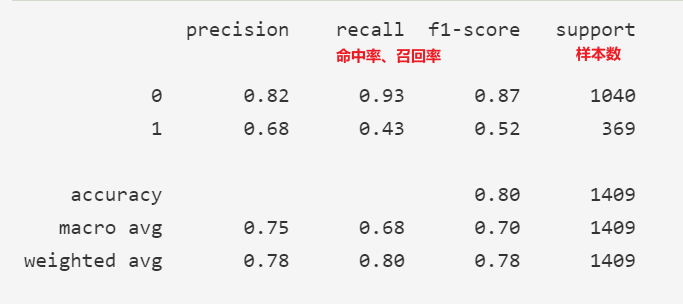

accuracy表示整体准确度，其值为0.8

support表示样本数，其中1061为实际分类为0的样本数，348为实际分类为1的样本数，1409为测试集的全部样本数

# ROC、AUC

In [9]:
# roc_curve 返回一个3元素的元组，依次为 fpr假警报率、tpr命中率、thres阈值
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])

In [10]:
a=pd.DataFrame()
a['阈值']=list(thres)
a['假警报率']=list(fpr)
a['命中率']=list(tpr)
a

,阈值,假警报率,命中率
0,1.930369,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230
...,...,...,...
373,0.034940,0.918944,0.994253
374,0.034861,0.918944,0.997126
375,0.032088,0.932139,0.997126
376,0.032016,0.932139,1.000000


第一行阈值没有意义，是max(y_score)+1，其往往设置为最大阈值（本案例中为0.930369）＋1，以保证没有任何记录被选中

第二行表示阈值>=0.930369时，才会判断流失

0.930369| 是如何来的呢？

In [12]:
tmp=pd.DataFrame(y_pred_proba,columns=['分类为0的概率','分类为1的概率'])
tmp.sort_values('分类为1的概率',ascending=False)[:20]

,分类为0的概率,分类为1的概率
326,0.069631,0.930369
366,0.085373,0.914627
662,0.092923,0.907077
1154,0.105118,0.894882
1036,0.105906,0.894094
1093,0.111303,0.888697
1164,0.115550,0.884450
891,0.116594,0.883406
437,0.123060,0.876940
1153,0.127293,0.872707


阈值的第三行，0.867342 是上述编号 49 的概率，因此 sklearn 计算 ROC 的时候并没有每个都取到

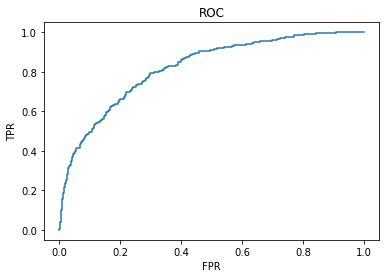

In [14]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [16]:
#计算AUC
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred_proba[:,1])
score

0.8200336356349118

# ks

In [13]:
# 计算 fpr、tpr、thres
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])

In [14]:
a=pd.DataFrame()
a['阈值']=list(thres)
a['假警报率']=list(fpr)
a['命中率']=list(tpr)
a

,阈值,假警报率,命中率
0,1.930369,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230
...,...,...,...
373,0.034940,0.918944,0.994253
374,0.034861,0.918944,0.997126
375,0.032088,0.932139,0.997126
376,0.032016,0.932139,1.000000


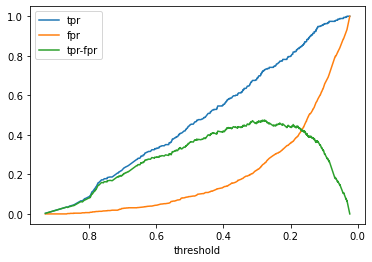

In [18]:
import matplotlib.pyplot as plt
plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr','fpr','tpr-fpr'])
plt.gca().invert_xaxis()# gca代表get current axes 获取坐标轴信息，invert_xaxis()函数反转x轴
plt.show()


In [22]:
max(tpr-fpr)

0.4744656418256471

KS值在[0.3，0.5]区间内，因此，该模型具有较强的区分能力。

In [23]:
# 查看 KS值 对应的 fpr、tpr、thres
a['TPR-FPR']=a['命中率']-a['假警报率']
a[a['TPR-FPR']==max(a['TPR-FPR'])]

,阈值,假警报率,命中率,TPR-FPR
224,0.27769,0.255419,0.729885,0.474466


# k折交叉验证

In [5]:
from sklearn.model_selection import cross_val_score
# cv 设置 k 的值，默认 3
# scoring 设置评估算法，默认 accuracy 精确度
acc=cross_val_score(model,X,y,cv=5,scoring='roc_auc')

In [6]:
acc

array([0.81492418, 0.82528869, 0.80092743, 0.80786416, 0.81379617])